In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
train_digits = pd.read_csv("data/mnist_train.csv", header=None)
#test_digits = pd.read_csv("data/mnist_test.csv")
train_array = train_digits.to_numpy()
#test_array = test_digits.to_numpy()

In [42]:
train_array.shape

(60000, 785)

In [ ]:
def show_digit(sample):
    """
    shows digit
    """
    img = test_array[sample-1, 1:]
    img.shape = (28,28)
    plt.imshow(img, 'gray')

In [ ]:
def avg_digit_img(dat, digit):
    """
    compute average intensities of all rows describing the same number
    :return: imshow as output
    """

    list_digit = []
    for i in range(0, dat.shape[0]):
        if dat[i, 0] == digit:
            list_digit.append(i)

    avg = np.zeros((1,784))
    
    for j in range(0, len(list_digit)):
        avg += dat[list_digit[j], 1:]
    
    avg.shape = (28,28)
    avg /= len(list_digit)

    plt.imshow(avg, 'gray')
    plt.colorbar()


In [ ]:
def avg_digit_arr(dat, digit):
    """
    computes average intensities of all rows describing the same number
    returns numpy array
    """
   
    list_digit = []
    for i in range(0, dat.shape[0]):
        if dat[i, 0] == digit:
            list_digit.append(i)

    avg = np.zeros((1,784))

    for j in range(0, len(list_digit)):
        avg += dat[list_digit[j], 1:]

    avg /= len(list_digit)

    return avg

In [ ]:
def digit_recognition(sample):
    """
    compare sample image with averaged images pixel by pixel
    select digit with lowest difference in intensity (output)
    """
    intensities_list = [] 
    sample_img = test_array[sample-1, 1:]

    for i in range(0,10):
        diff_arr = sample_img - avg_digit_arr(train_array, i)
        
        diff_list = []
        for j in range(0, 784):
            diff_list.append(diff_arr[0, j])

        intensity_sum = 0
        for k in range(0, len(diff_list)):
            diff_list[k] = diff_list[k]**2
            diff_list[k] = np.sqrt(diff_list[k])
            intensity_sum += diff_list[k]

        intensities_list.append(intensity_sum)

    return intensities_list.index(min(intensities_list))

In [ ]:
def return_label(sample):
    """
    can be used for validation
    """
    return test_array[sample-1, 0]

In [ ]:
avg_list = []

for i in range(0,10):
    avg_list.append(avg_digit_arr(train_array, i))

def digit_recognition_fast(sample):
    """
    faster digit recognition because avg images are stored at the beginning and not calculated each time
    """
    intensities_list = [] 
    sample_img = test_array[sample-1, 1:] 

    for i in range(0,10):
        diff_arr = sample_img - avg_list[i]
        
        diff_list = []
        for j in range(0, 784):
            diff_list.append(diff_arr[0, j])

        intensity_sum = 0
        for k in range(0, len(diff_list)):
            diff_list[k] = diff_list[k]**2
            diff_list[k] = np.sqrt(diff_list[k])
            intensity_sum += diff_list[k]

        intensities_list.append(intensity_sum)

    return intensities_list.index(min(intensities_list))

In [ ]:
#Überprüfung digit recognition mit methode vergleich zu avg images

true = 0
false = 0

#for i in range(0, test_array.shape[0]):
#if digit_recognition_fast(i+1) == test_array[i, 0]:
    true += 1
else:
    false += 1

#print(f'Anzahl richtig erkannter Digits: {true} \n\
Anzahl falsch erkannter Digits: {false} \n\
Richtig: {true/test_array.shape[0]*100} Prozent')
#66,85 Prozent

In [ ]:
#plots for project proposal

#plt.hist(train_array[:,0], rwidth = 0.9)
#plt.xlabel('digits')
#plt.ylabel('counts')
#plt.title('training dataset')


In [ ]:
def digit_rec_comp(sample):
    """
    nice output for digit recognition comparison
    """
    
    print(f'Prediction: {digit_recognition(sample)}\n\
Real digit: {return_label(sample)}')
    show_digit(sample)

In [ ]:
#Z-Transformation
#Druchschnittsberechnung

mean_pixels = np.zeros((1, 784))
for i in range(0, train_array.shape[0]):
    mean_pixels += train_array[i, 1:train_array.shape[1]]
mean_pixels /= train_array.shape[0]

#Standardabweichung
std_pixels = np.zeros((1, 784))
for i in range(1, train_array.shape[1]):
    std_pixels[0, i-1] = np.std(train_array[:, i])

#print(std_pixels)

#Erstellen z-array 
z_array = np.zeros(train_array.shape)

for i in range(0, train_array.shape[0]):
    z_array[i, 0] = train_array[i, 0]
    for j in range(1, train_array.shape[1]):
        if std_pixels[0, j-1] != 0:
            z_array[i, j] = (train_array[i, j] - mean_pixels[0, j-1])/std_pixels[0, j-1]

#print(z_array)


In [ ]:
def kNN(img, k=5):
    counter = [0,0,0,0,0,0,0,0,0,0]
    max_indices = []

    M = 1
    N = train_array[:, 1:].shape[0]

    img_dots = (img*img).sum(axis=0).reshape((M,1))*np.ones(shape=(1,N))
    train_array_dots = (train_array[:, 1:]*train_array[:, 1:]).sum(axis=1)*np.ones(shape=(M,1))
    D_squared =  img_dots + train_array_dots - 2*img.dot(train_array[:, 1:].T)
    D = np.sqrt(D_squared)
    
    dist_mau = D.tolist()
    dist = dist_mau[0]
    small_dist = sorted(range(len(dist)), key = lambda sub: dist[sub])[:k]
    
    for j in range(0, len(small_dist)):
        counter[train_array[small_dist[j],0]] += 1

    for k in range(0, len(counter)):
        if counter[k] == max(counter):
            max_indices.append(k)

    if len(max_indices) == 1:
        return max_indices[0]

    else:
        return 10

In [ ]:
def validation_kNN(s_size, k=5):
    true = 0
    false = 0
    doppel_max = 0

    for i in range(0, s_size):
        result_kNN = kNN(test_array[i, 1:], k)
        if result_kNN == 10:
            doppel_max += 1
        elif result_kNN != test_array[i, 0]:
            false += 1
        elif result_kNN == test_array[i, 0]:
            true += 1

    return print(f'Anzahl richtig erkannter Digits: {true}\n\
Anzahl falsch erkannter Digits: {false}\n\
Anzahl mit mehreren Maxima: {doppel_max}\n\
\nAnteil richtiger Vorhersagen: {(true/s_size)*100}%')


In [ ]:
#liste mit indexen von Spalten mit Std = 0
std0 = []
for i in range(1, z_array.shape[1]):
    if np.std(z_array[:, i]) == 0:
        std0.append(i)

print(std0)
    

In [ ]:
# Spalten mit Std = 0 löschen
z_cleaned = np.delete(z_array, std0, 1)

print(z_cleaned[:, 1:])

In [ ]:
#correlation
cov_arr = np.cov(z_cleaned[:, 1:], rowvar = False)
print(cov_arr)

In [ ]:
#eigenvectors and eigenvalues 
eigen_val, eigen_vec = np.linalg.eigh(cov_arr)
print(eigen_val)
print(eigen_vec)

In [ ]:
# np.argsort returns indeices that would sort and array

index_sorted = np.argsort(eigen_val)[::-1]

sorted_eigenval = eigen_val[index_sorted]
sorted_eigenvec = eigen_vec[:,index_sorted]

print(sorted_eigenval)

In [ ]:
#subset from eigenvalue matrix
n_components = 30
eigenvec_subset = sorted_eigenvec[:, 0:n_components]

In [ ]:
#transform data

X_reduced = np.dot(eigenvec_subset.transpose(), z_cleaned[:, 1:].transpose()).transpose()
X_reduced.shape

In [ ]:
#jetzt komplett als Funktion:
#input ist normale matrix, z-Transformation und Löschen von std=0 Spalten wird hier in Funktion gemacht

def PCA(X_no_label, num_components):

    #z-transformation
    std0 = []
    for i in range(0, X_no_label.shape[1]):
        if np.std(X_no_label[:, i]) == 0:
            std0.append(i)
    X_cleaned =  np.delete(X_no_label, std0, 1)

    X_z = (X_cleaned - np.mean(X_cleaned, axis = 0))/np.std(X_cleaned, axis = 0)

    #variance
    cov_arr = np.cov(X_z, rowvar = False)

    #eigenvalues, eigenvectors
    eigen_val, eigen_vec = np.linalg.eigh(cov_arr)

    #sorting
    index_sorted = np.argsort(eigen_val)[::-1]
    sorted_eigenval = eigen_val[index_sorted]
    sorted_eigenvec = eigen_vec[:,index_sorted]

    #selecting subset
    eigenvec_subset = sorted_eigenvec[:, 0:num_components]

    #dimension reduction
    X_reduced = np.dot(eigenvec_subset.transpose(), X_z.transpose()).transpose()

    return X_reduced
    

In [ ]:
pca10 = PCA(train_array[:, 1:], 10)
pca10.shape

pca30 = PCA(train_array[:, 1:], 30)

In [ ]:

PCA2_df = pd.DataFrame(pca10[:, 0:2], columns = ['PC1', 'PC2'])
PCA2_df = pd.concat([PCA2_df, pd.DataFrame(train_array[:, 0])], axis = 1)


In [ ]:
PCA2_30_df = pd.DataFrame(pca30[:, 0:2], columns = ['PC1', 'PC2'])
PCA2_30_df = pd.concat([PCA2_30_df, pd.DataFrame(train_array[:, 0])], axis = 1)

PCA3_df = pd.DataFrame(pca30[:, 0:3], columns = ['PC1', 'PC2','PC3'])
PCA3_df = pd.concat([PCA3_df, pd.DataFrame(train_array[:, 0])], axis = 1)

In [ ]:
from matplotlib.colors import ListedColormap

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

fig = plt.figure()
ax = fig.gca(projection='3d')
cmap = ListedColormap(sb.color_palette("husl", 256).as_hex())
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

In [ ]:
import seaborn as sb

plt.figure(figsize = (10,10))
sb.scatterplot(data = PCA2_30_df, x = 'PC1', y = 'PC2', hue = train_array[:, 0] ,s = 30, palette = 'icefire', legend='full')

In [1]:
import Functions.PCA as pca
from Functions import kNN as knn

In [3]:
z_array, z_image = pca.z_transformation(train_array[:, 1:], test_array[3, 1:])

In [4]:
pca_arr, pca_img = pca.PCA(z_array, z_image, num_components=30)

In [5]:
print(pca_arr)
print(pca_img)

[[ 8.70903437e+00 -7.75426009e+00  3.44763482e+00 ... -8.66507906e-03
   1.96845986e-01  4.75636587e-01]
 [ 2.32823872e+00  9.43074644e+00  6.18430573e+00 ... -1.00613015e+01
  -2.71509628e+00  2.48278003e+00]
 [-6.58214283e+00 -3.74657039e+00 -3.69095794e+00 ...  5.56887505e-01
  -9.59013124e-01 -1.21553034e+00]
 ...
 [-3.77685315e+00 -3.23051494e+00  3.80634410e+00 ... -2.64021422e-01
   1.24079819e+00 -2.36909271e+00]
 [ 1.72229905e+00 -4.94829634e+00 -7.14453123e-03 ... -5.07137445e+00
   4.09146591e+00  1.16470057e+00]
 [-1.42720983e+00 -6.17571668e+00  2.96754049e+00 ... -1.27836227e+00
   2.31401745e+00  9.07598663e-01]]
[ 3.83723360e-01  4.58465744e+00  3.64259948e+00  3.32486665e+00
 -2.26385460e+00 -1.08444631e-01 -3.38202403e+00  4.65527103e+00
  4.83045682e+00 -3.75646946e+00  1.06151188e+00 -1.43402527e+00
 -2.47653772e+00  1.62604008e+00 -1.14318134e+00  1.79094962e+00
 -1.73334906e+00  3.85089402e+00 -6.82322048e-01  1.39566915e-01
  6.41312125e-01  1.24894252e+00 -4.613

In [5]:
def kNN(img, k=4, train = True):
    counter = [0,0,0,0,0,0,0,0,0,0]
    max_indices = []
    dist = knn.distances(pca_arr, img)

    if train == True:
        k_smallest = sorted(range(len(dist)), key = lambda sub: dist[sub])[1:k+1]
    
    else:
        k_smallest = sorted(range(len(dist)), key = lambda sub: dist[sub])[0:k]

    
    for i in range(0, k):
        counter[train_array[k_smallest[i],0]] += 1

    for j in range(0, 9):
        if counter[j] == max(counter):
            max_indices.append(j)

    if len(max_indices) == 1:
        return max_indices[0]

    else:
        dist = knn.distances(pca_arr, img)
        if train == True:
            k_smallest = sorted(range(len(dist)), key = lambda sub: dist[sub])[1]
        else:
            k_smallest = sorted(range(len(dist)), key = lambda sub: dist[sub])[0]
        return train_array[k_smallest,0]

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import Functions.PCA as pca
import Functions.data_load as dat
import Functions.visualization as vis
import Functions.average_img as avg

train_array, test_array = dat.load_data()
z_array, z_img = pca.z_transformation(train_array[:,1:], test_array[5,1:])
reduced_set, reduced_img = pca.PCA(z_array, z_img, num_components=30)


NameError: name 'arr_cleaned_df' is not defined

In [1]:
cov_arr = np.cov(z_array, rowvar = False)
cov_df = pd.DataFrame(cov_arr)
dataplot = sb.heatmap(cov_df, cmap="viridis", annot=False, square=True)

sb.set(rc={"figure.dpi":100, "figure.figsize":(5, 5)})

NameError: name 'np' is not defined

In [36]:
def visualize_2d(reduced_dataset, labels, i=0, j=1):
    """
    scatterplot of principal images based on principal components

    :param reduced_dataset: dataset with PCs as features
    """
    pca_df = pd.DataFrame(data = {f'PC{i}':reduced_dataset[:, i], f'PC{j}':reduced_dataset[:, j]})
    sb.set(rc={"figure.dpi":500, "figure.figsize":(5, 5)})

    sb.relplot(data = pca_df, x = f'PC{i}', y = f'PC{j}', hue = labels ,s = 1, palette = 'icefire', legend='full')

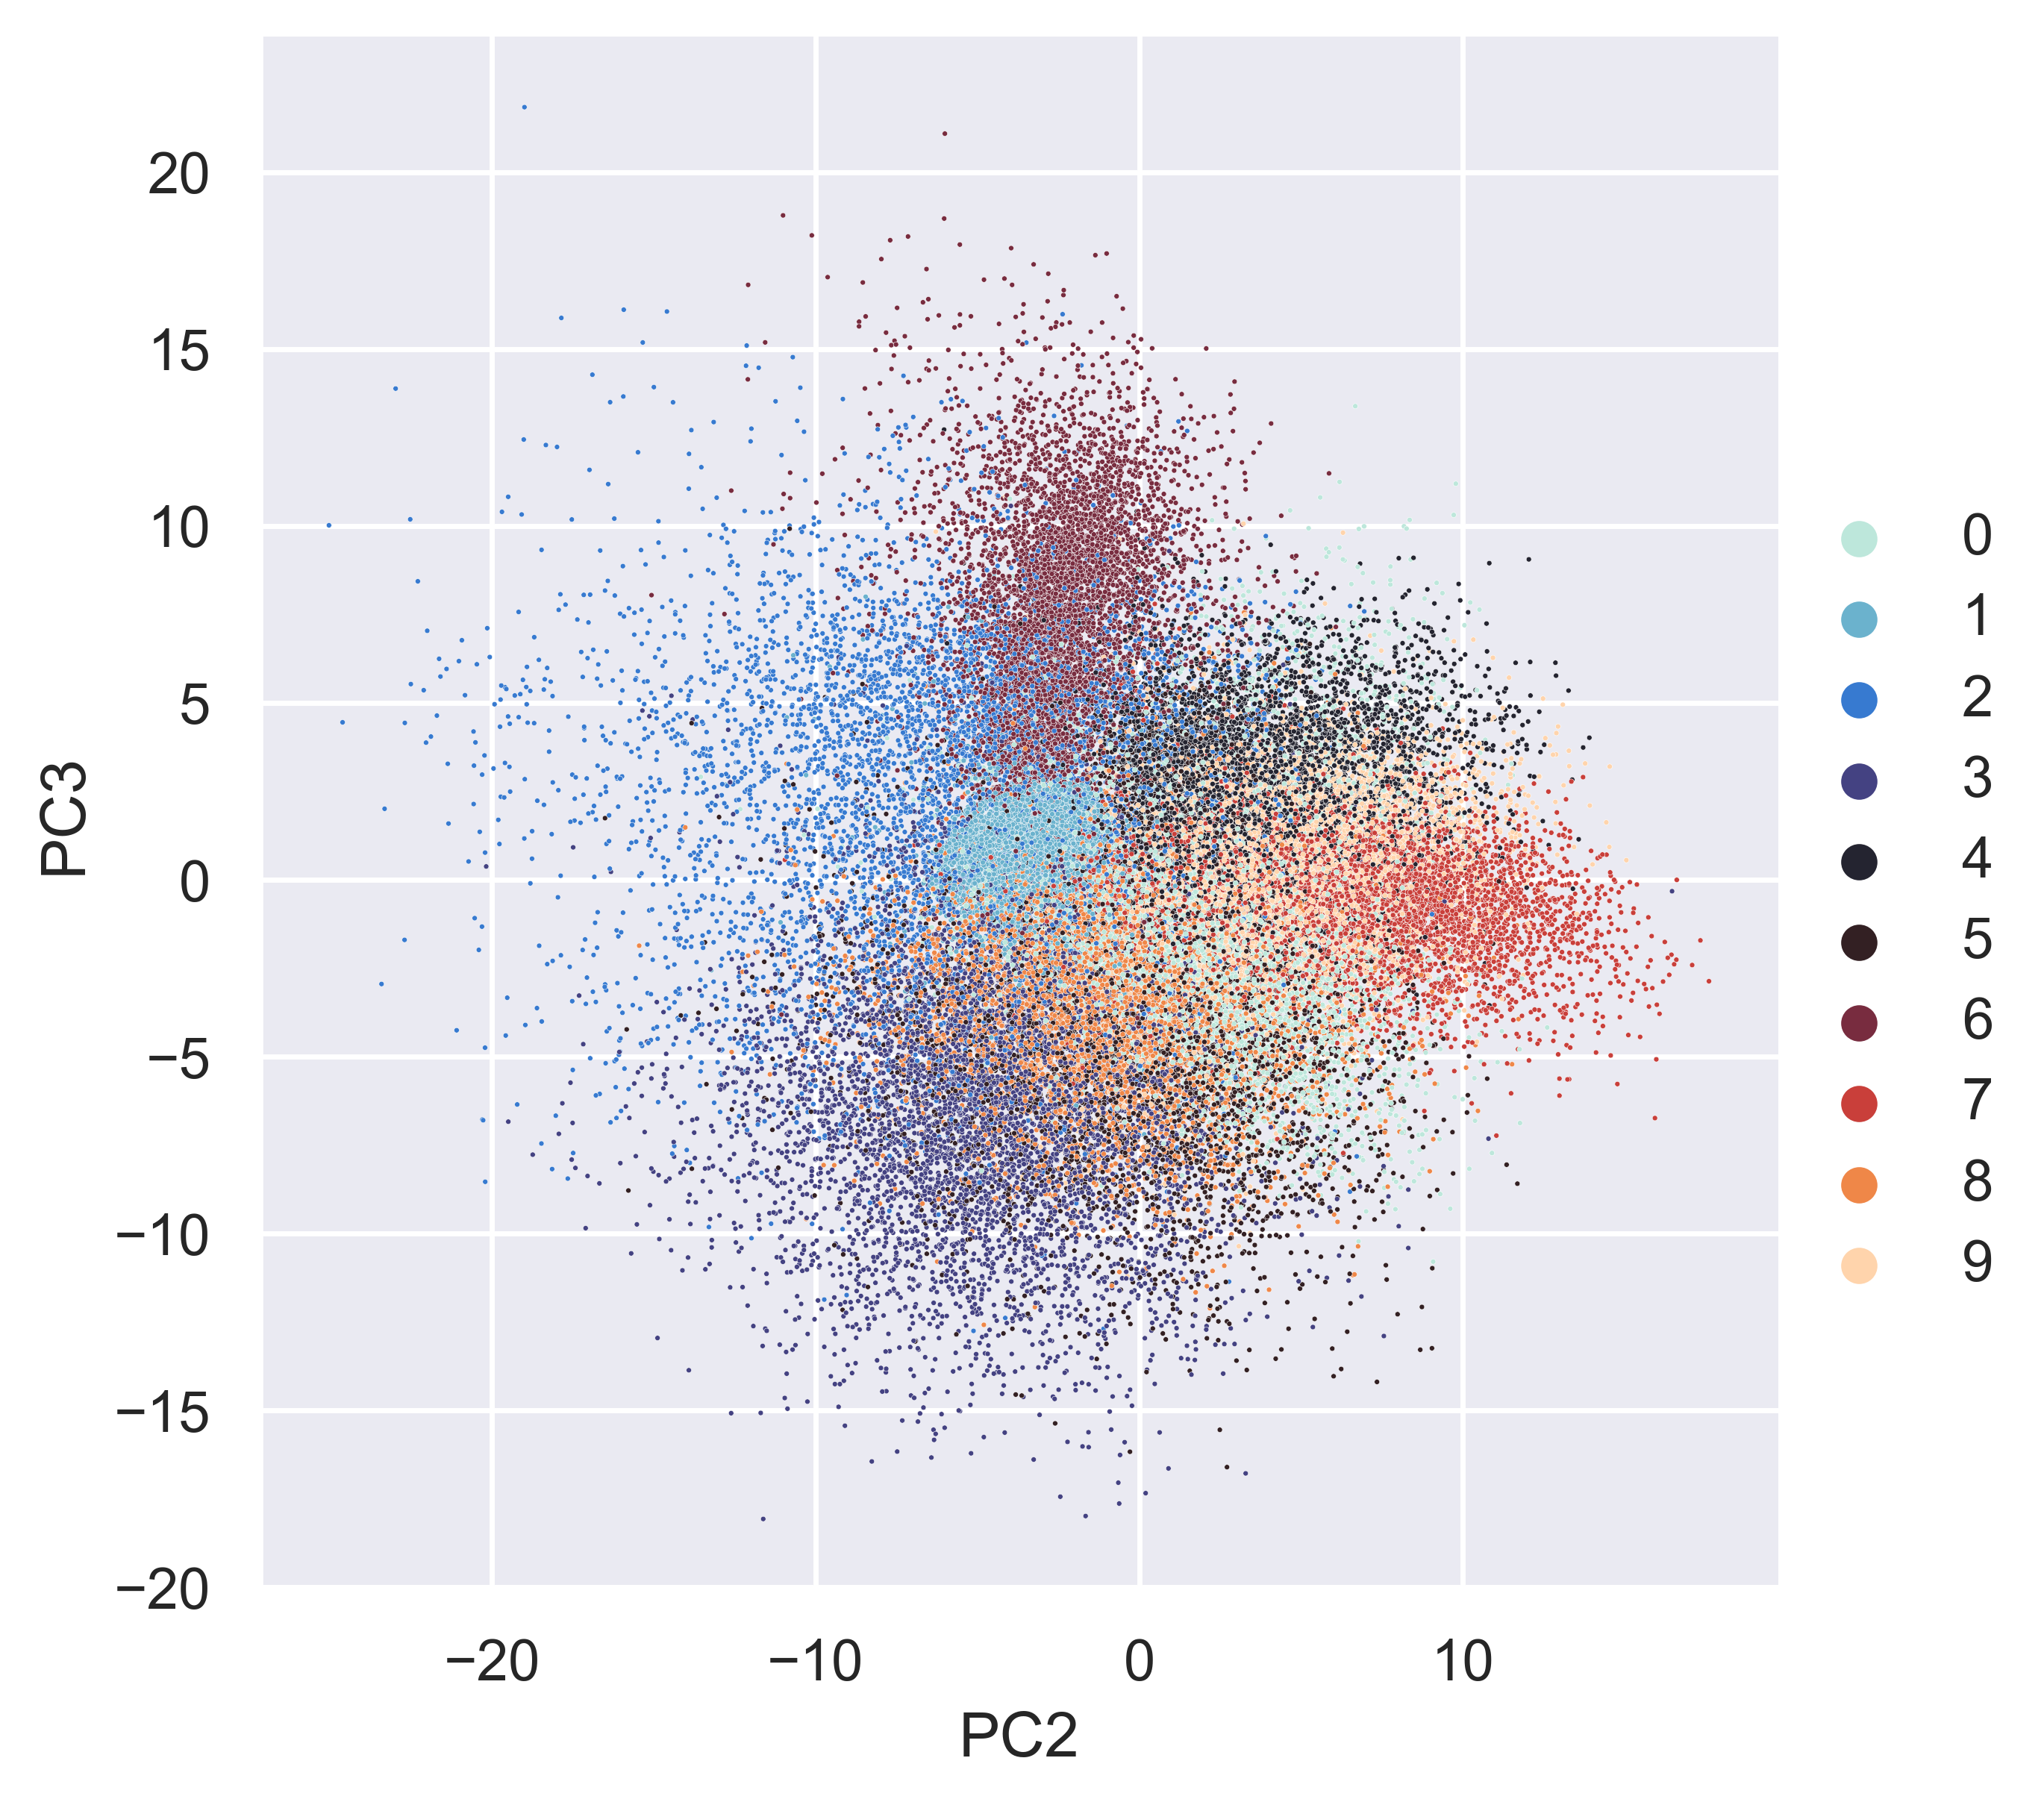

In [37]:
visualize_2d(reduced_set, train_array[:, 0], i=2, j=3)

In [39]:
print(train_array[0,0])

0
